# Requirements

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Add as many imports as you need.
import numpy as np
import pandas as pd

# Add as many imports as you need.
# Add as many imports as you need.
from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
%load_ext autoreload
%autoreload 2

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [3]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./data/blood_pressure_data.csv")
df

id         age  height(cm)  weight(kg)  relaxation  blood sugar  \
0          NaN         NaN       180.0        65.0        70.0          NaN   
1      57468.0    7/5/1979       150.0        50.0        88.0         92.0   
2      55209.0  11/27/1954       175.0        75.0         NaN          NaN   
3       3335.0   9/13/1984       160.0         NaN         NaN        100.0   
4      70782.0   8/15/1984       170.0         NaN        68.0         99.0   
...        ...         ...         ...         ...         ...          ...   
9995   43983.0         NaN       180.0        75.0        69.0        100.0   
9996   65781.0         NaN       160.0         NaN        72.0        100.0   
9997  125800.0    8/3/1989       165.0        65.0        72.0         83.0   
9998    6795.0         NaN       160.0        75.0        82.0         88.0   
9999       NaN  10/23/1989       170.0        70.0         NaN         93.0   

      Cholesterol triglyceride   HDL    LDL  hemoglobin  Urine protein  \
0           149.0          NaN   NaN   87.0        13.9            1.0   
1           219.0          LOW   NaN  137.0        13.2            NaN   
2           217.0       NORMAL  50.0  142.0         NaN            1.0   
3           160.0         HiGH  48.0   84.0        12.1            1.0   
4           176.0          LOW   NaN   96.0        13.8            1.0   
...           ...          ...   ...    ...         ...            ...   
9995        180.0     ABNORMAL  76.0   98.0        14.7            NaN   
9996          NaN       NORMAL   NaN   99.0        15.3            1.0   
9997        207.0          NaN  65.0  134.0         NaN            1.0   
9998          NaN         HiGH  63.0  112.0        14.4            1.0   
9999          NaN          UNK   NaN  103.0        17.5            NaN   

      serum creatinine   AST   ALT   Gtp dental caries  blood pressure  
0                  NaN  19.0   NaN   NaN            No           112.0  
1                  0.6  26.0  17.0   NaN            No           138.0  
2                  0.8  22.0  22.0   NaN            No           137.0  
3                  0.6  15.0  19.0  14.0            No           133.0  
4                  0.9  33.0   NaN  11.0            No             NaN  
...                ...   ...   ...   ...           ...             ...  
9995               0.8  29.0  39.0  73.0            No           120.0  
9996               0.7  22.0  49.0  91.0            No           110.0  
9997               0.9  20.0  21.0  23.0            No           128.0  
9998               0.9  18.0  15.0  64.0            No           121.0  
9999               1.1  48.0   NaN  89.0           Yes           120.0  

[10000 rows x 18 columns]

In [4]:
birthdays = df["age"].to_list()

In [5]:
birthdays[0]

nan

In [6]:
actual_ages = []
for birthdate in birthdays:
    if birthdate is np.nan:
        actual_ages.append(np.nan)
        continue
    age = 2024 - int(birthdate.split("/")[-1])
    actual_ages.append(age)
actual_ages

[nan,
 45,
 70,
 40,
 40,
 nan,
 60,
 35,
 35,
 36,
 nan,
 nan,
 45,
 55,
 51,
 nan,
 60,
 40,
 60,
 nan,
 nan,
 45,
 45,
 60,
 45,
 70,
 50,
 55,
 45,
 40,
 60,
 35,
 nan,
 nan,
 60,
 60,
 nan,
 60,
 40,
 40,
 65,
 55,
 nan,
 nan,
 40,
 50,
 40,
 30,
 nan,
 nan,
 20,
 40,
 40,
 50,
 45,
 nan,
 70,
 45,
 55,
 nan,
 nan,
 nan,
 55,
 60,
 40,
 36,
 61,
 nan,
 nan,
 nan,
 50,
 60,
 20,
 60,
 41,
 40,
 31,
 40,
 nan,
 45,
 40,
 30,
 50,
 nan,
 50,
 nan,
 nan,
 60,
 50,
 55,
 45,
 36,
 55,
 nan,
 25,
 nan,
 nan,
 40,
 nan,
 30,
 41,
 20,
 30,
 40,
 nan,
 nan,
 25,
 40,
 50,
 30,
 55,
 80,
 45,
 41,
 50,
 nan,
 40,
 40,
 60,
 nan,
 20,
 40,
 40,
 nan,
 60,
 60,
 40,
 nan,
 60,
 51,
 30,
 25,
 nan,
 40,
 30,
 70,
 20,
 40,
 nan,
 50,
 35,
 25,
 45,
 60,
 25,
 55,
 40,
 45,
 40,
 60,
 50,
 nan,
 nan,
 75,
 nan,
 50,
 nan,
 nan,
 40,
 70,
 25,
 55,
 nan,
 nan,
 65,
 nan,
 nan,
 60,
 nan,
 45,
 nan,
 nan,
 nan,
 nan,
 nan,
 40,
 35,
 61,
 41,
 nan,
 35,
 40,
 50,
 25,
 60,
 nan,
 45,
 55,
 nan,


In [7]:
df["age"] = actual_ages

In [8]:
df

id   age  height(cm)  weight(kg)  relaxation  blood sugar  \
0          NaN   NaN       180.0        65.0        70.0          NaN   
1      57468.0  45.0       150.0        50.0        88.0         92.0   
2      55209.0  70.0       175.0        75.0         NaN          NaN   
3       3335.0  40.0       160.0         NaN         NaN        100.0   
4      70782.0  40.0       170.0         NaN        68.0         99.0   
...        ...   ...         ...         ...         ...          ...   
9995   43983.0   NaN       180.0        75.0        69.0        100.0   
9996   65781.0   NaN       160.0         NaN        72.0        100.0   
9997  125800.0  35.0       165.0        65.0        72.0         83.0   
9998    6795.0   NaN       160.0        75.0        82.0         88.0   
9999       NaN  35.0       170.0        70.0         NaN         93.0   

      Cholesterol triglyceride   HDL    LDL  hemoglobin  Urine protein  \
0           149.0          NaN   NaN   87.0        13.9            1.0   
1           219.0          LOW   NaN  137.0        13.2            NaN   
2           217.0       NORMAL  50.0  142.0         NaN            1.0   
3           160.0         HiGH  48.0   84.0        12.1            1.0   
4           176.0          LOW   NaN   96.0        13.8            1.0   
...           ...          ...   ...    ...         ...            ...   
9995        180.0     ABNORMAL  76.0   98.0        14.7            NaN   
9996          NaN       NORMAL   NaN   99.0        15.3            1.0   
9997        207.0          NaN  65.0  134.0         NaN            1.0   
9998          NaN         HiGH  63.0  112.0        14.4            1.0   
9999          NaN          UNK   NaN  103.0        17.5            NaN   

      serum creatinine   AST   ALT   Gtp dental caries  blood pressure  
0                  NaN  19.0   NaN   NaN            No           112.0  
1                  0.6  26.0  17.0   NaN            No           138.0  
2                  0.8  22.0  22.0   NaN            No           137.0  
3                  0.6  15.0  19.0  14.0            No           133.0  
4                  0.9  33.0   NaN  11.0            No             NaN  
...                ...   ...   ...   ...           ...             ...  
9995               0.8  29.0  39.0  73.0            No           120.0  
9996               0.7  22.0  49.0  91.0            No           110.0  
9997               0.9  20.0  21.0  23.0            No           128.0  
9998               0.9  18.0  15.0  64.0            No           121.0  
9999               1.1  48.0   NaN  89.0           Yes           120.0  

[10000 rows x 18 columns]

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
ordinal_encoder = OrdinalEncoder()
tmp = ordinal_encoder.fit_transform(df[["triglyceride"]])
df["triglyceride"] = tmp

In [11]:
df["dental caries"].replace("No", 0, inplace=True)
df["dental caries"].replace("Yes", 1, inplace=True)

C:\Users\User-PC\AppData\Local\Temp\ipykernel_21084\923739139.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["dental caries"].replace("No", 0, inplace=True)
C:\Users\User-PC\AppData\Local\Temp\ipykernel_21084\923739139.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

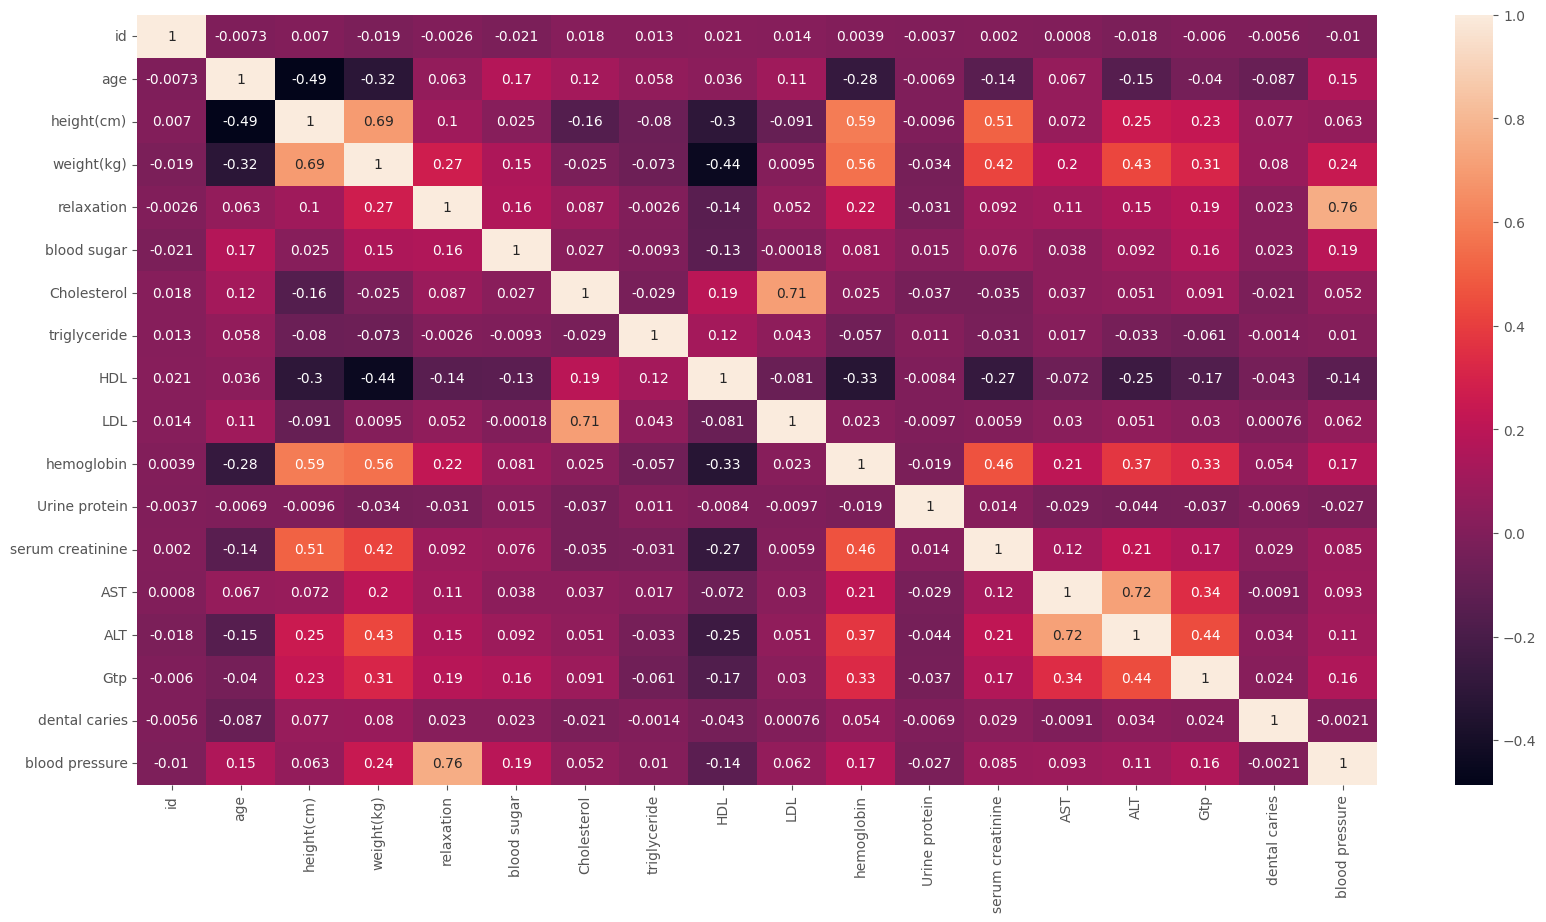

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, )
plt.show()

In [13]:
["height", "hemoglobin"]

['height', 'hemoglobin']

Explore the dataset using visualizations of your choice.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7328 non-null   float64
 1   age               7312 non-null   float64
 2   height(cm)        7373 non-null   float64
 3   weight(kg)        7444 non-null   float64
 4   relaxation        7425 non-null   float64
 5   blood sugar       7438 non-null   float64
 6   Cholesterol       7386 non-null   float64
 7   triglyceride      8644 non-null   float64
 8   HDL               7391 non-null   float64
 9   LDL               7358 non-null   float64
 10  hemoglobin        7417 non-null   float64
 11  Urine protein     7475 non-null   float64
 12  serum creatinine  7433 non-null   float64
 13  AST               7427 non-null   float64
 14  ALT               7416 non-null   float64
 15  Gtp               7411 non-null   float64
 16  dental caries     10000 non-null  int64  

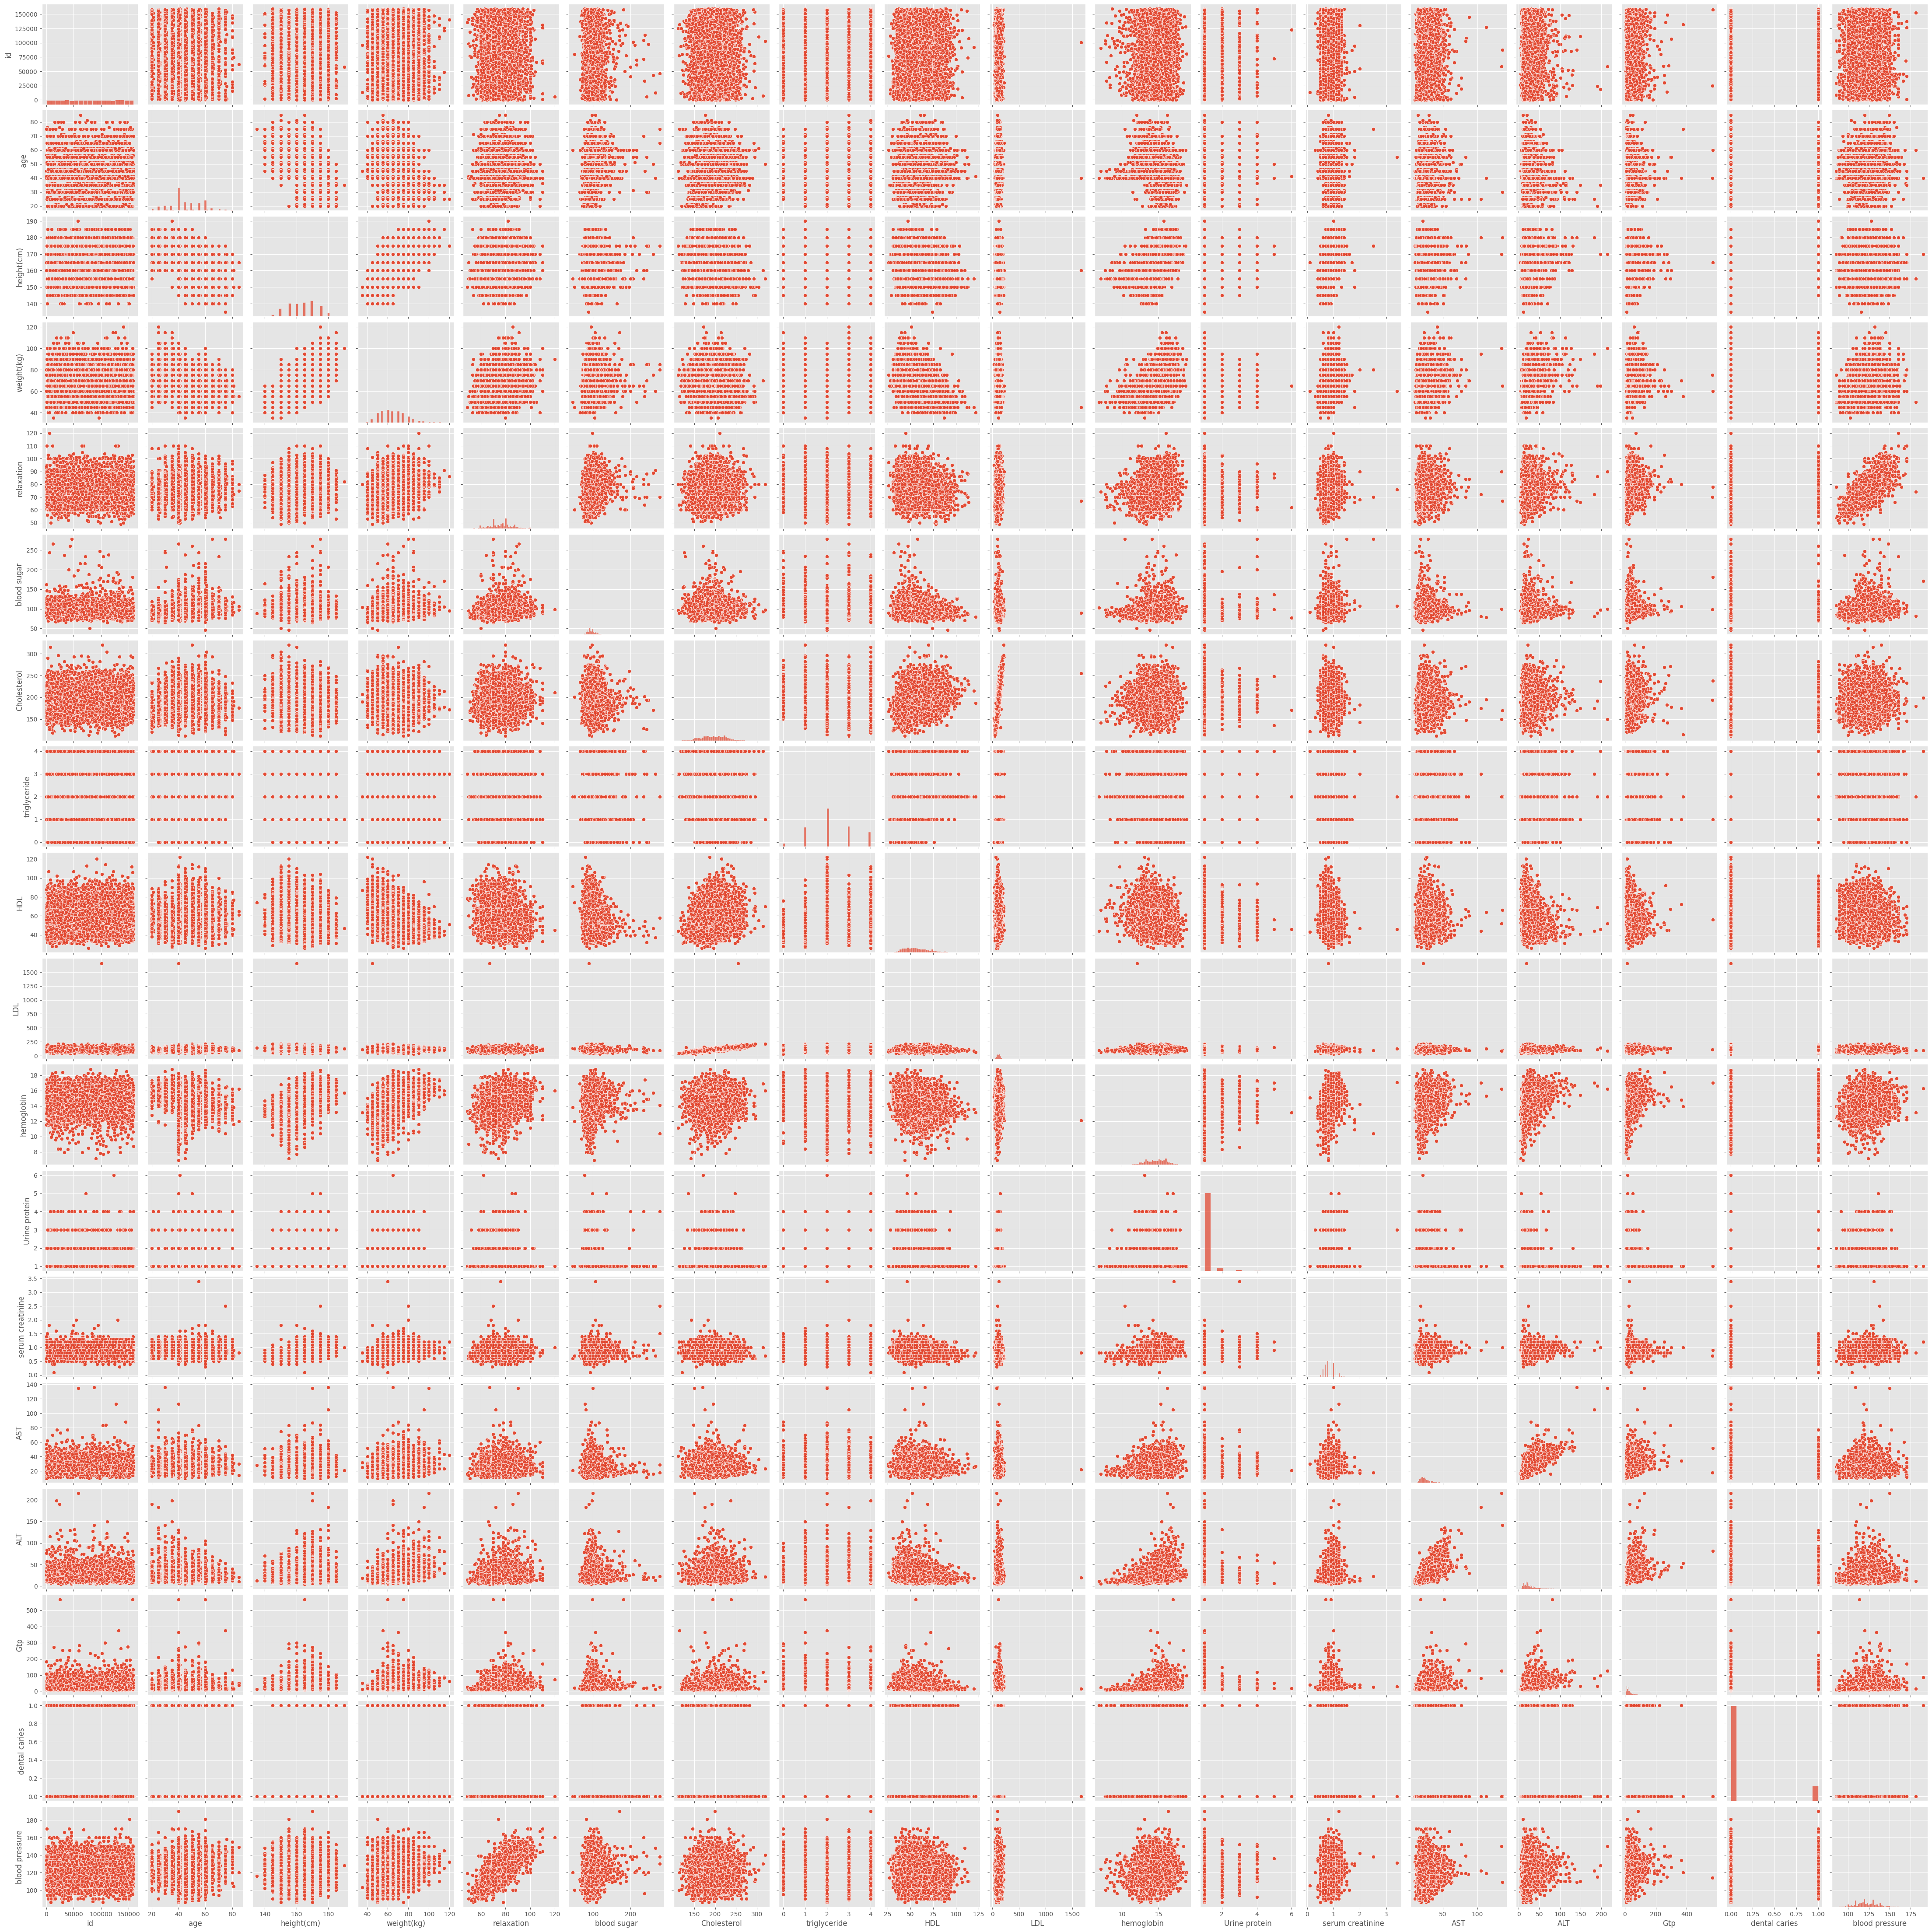

In [15]:
# Write your code here. Add as many boxes as you need.
sns.pairplot(df)

In [16]:
df.isna().sum()

id                  2672
age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [17]:
df.isna().sum() / len(df)

id                  0.2672
age                 0.2688
height(cm)          0.2627
weight(kg)          0.2556
relaxation          0.2575
blood sugar         0.2562
Cholesterol         0.2614
triglyceride        0.1356
HDL                 0.2609
LDL                 0.2642
hemoglobin          0.2583
Urine protein       0.2525
serum creatinine    0.2567
AST                 0.2573
ALT                 0.2584
Gtp                 0.2589
dental caries       0.0000
blood pressure      0.2523
dtype: float64

In [18]:
df.drop(columns="id", inplace=True)

In [19]:
df.dropna(subset="blood pressure", axis=0, inplace=True)

In [20]:
df.isna().sum() / len(df)

age                 0.265080
height(cm)          0.263073
weight(kg)          0.257724
relaxation          0.255450
blood sugar         0.260399
Cholesterol         0.262940
triglyceride        0.134680
HDL                 0.262405
LDL                 0.262940
hemoglobin          0.262271
Urine protein       0.254246
serum creatinine    0.256921
AST                 0.257189
ALT                 0.256654
Gtp                 0.257724
dental caries       0.000000
blood pressure      0.000000
dtype: float64

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

<Axes: >

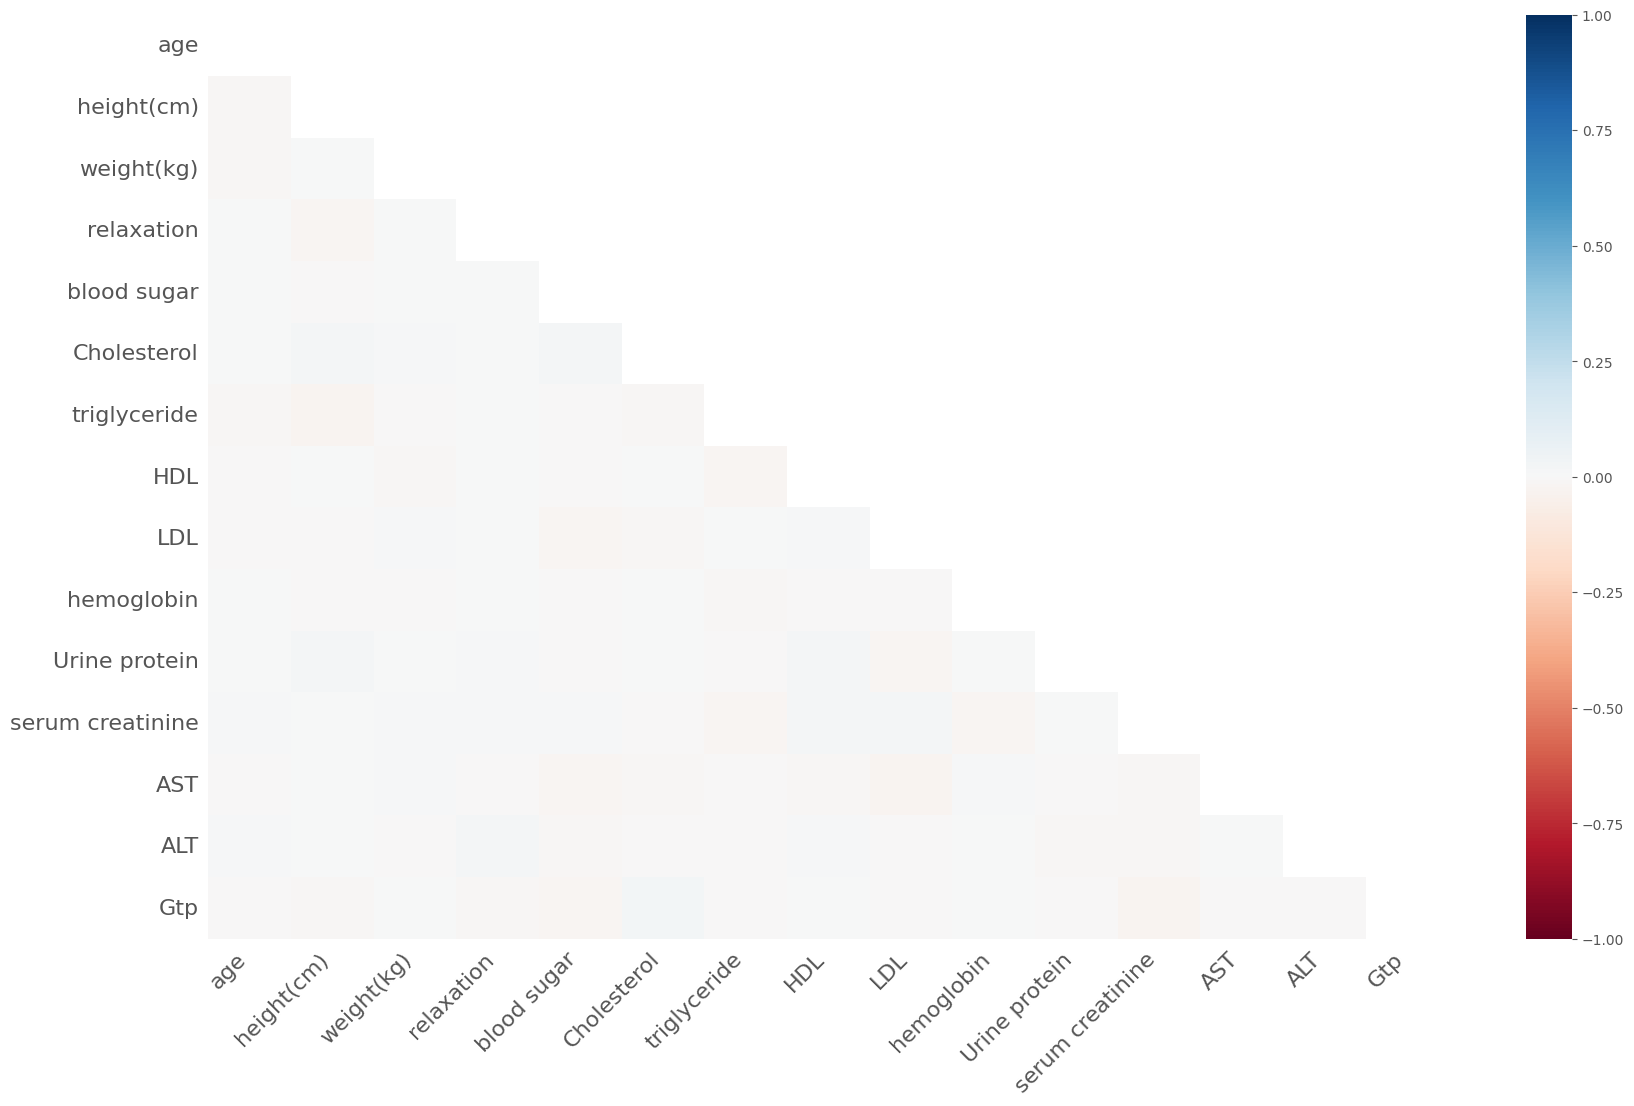

In [21]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(df)

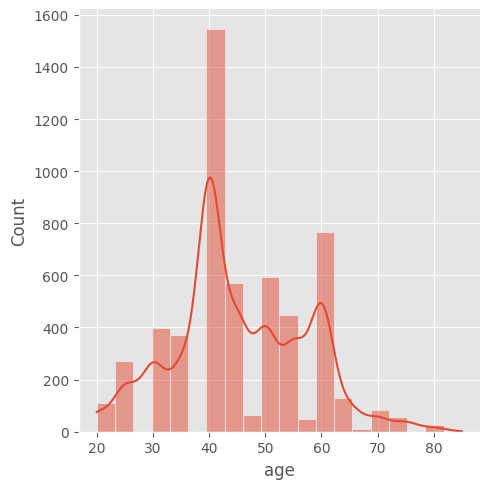

In [22]:
sns.displot(df, x="age", kde=True, bins=20)

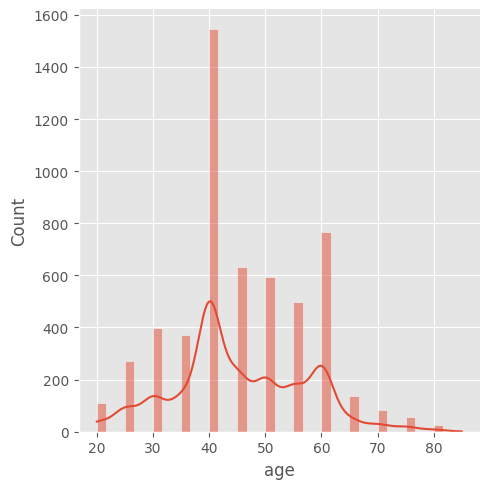

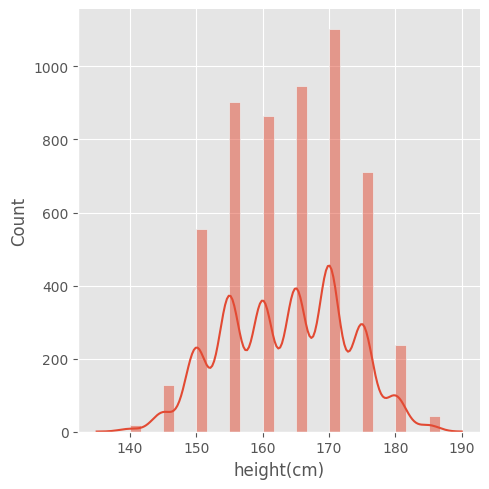

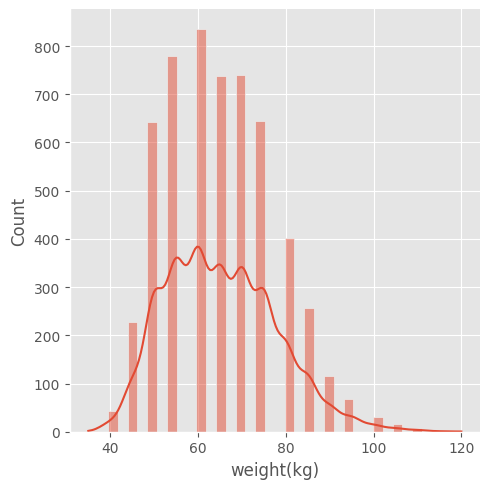

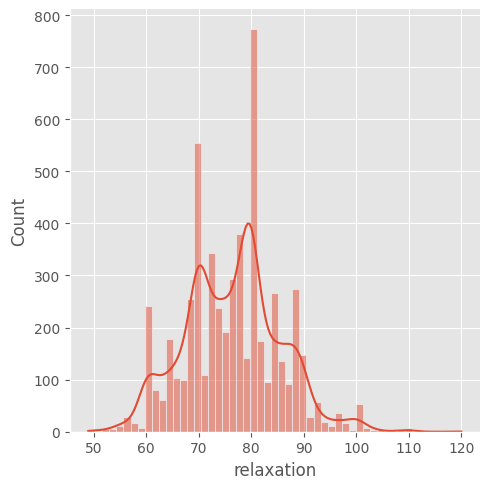

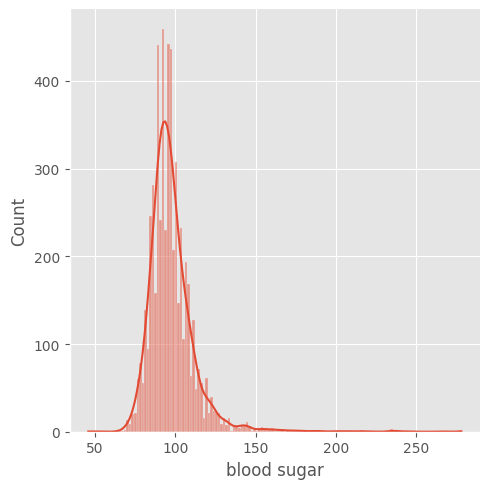

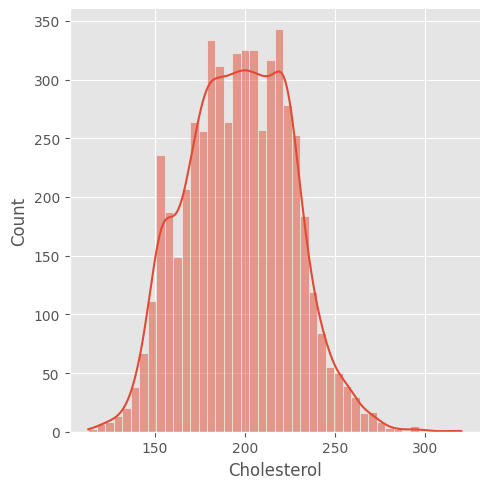

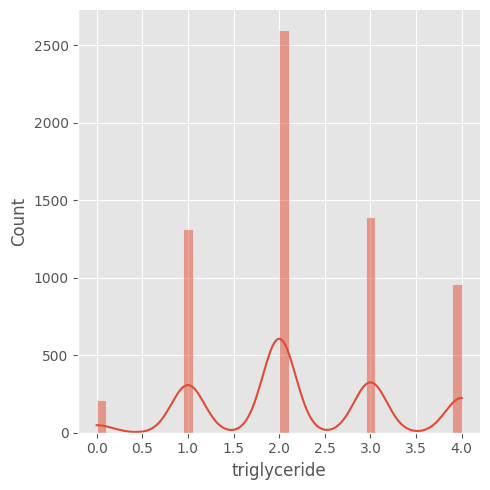

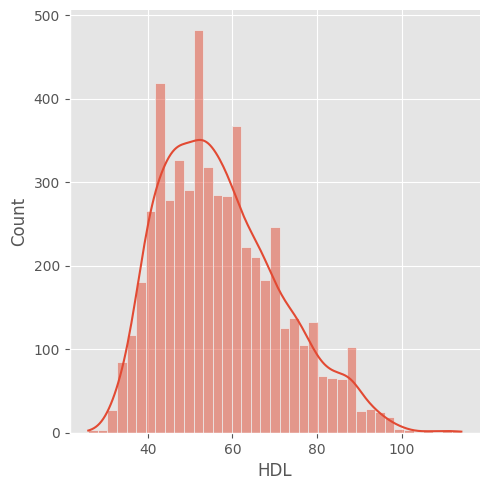

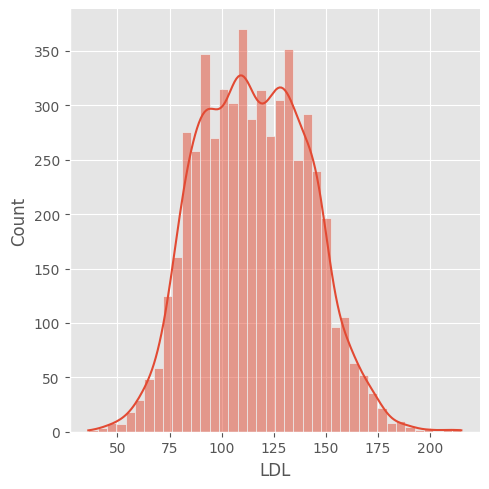

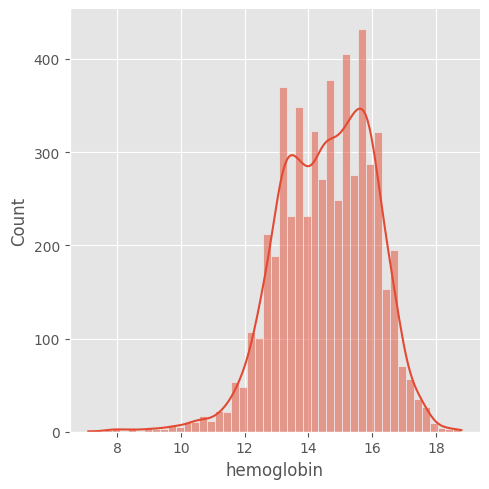

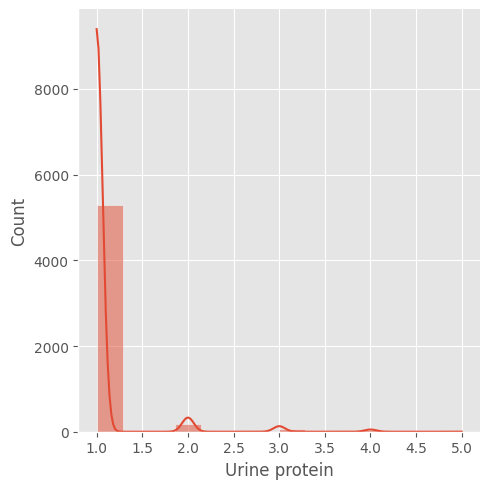

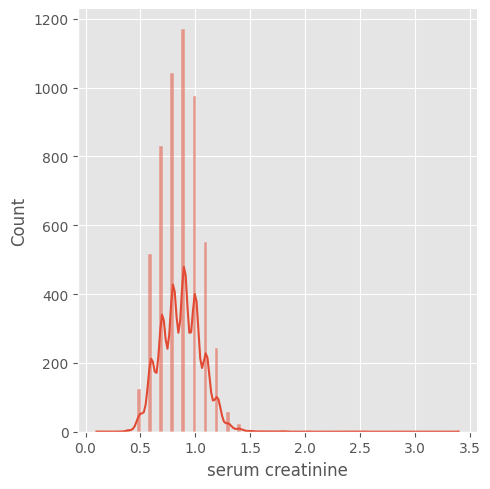

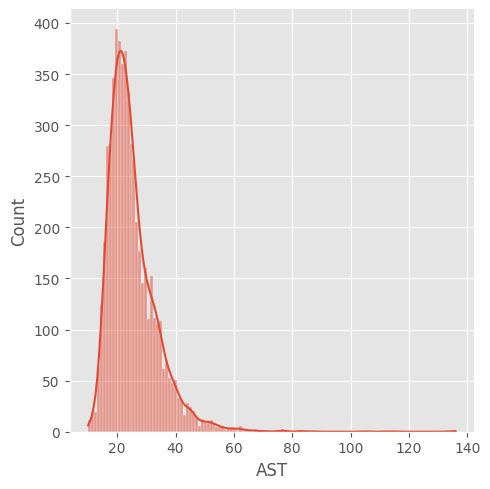

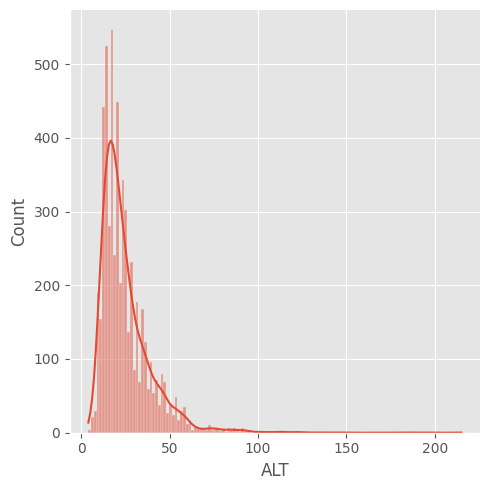

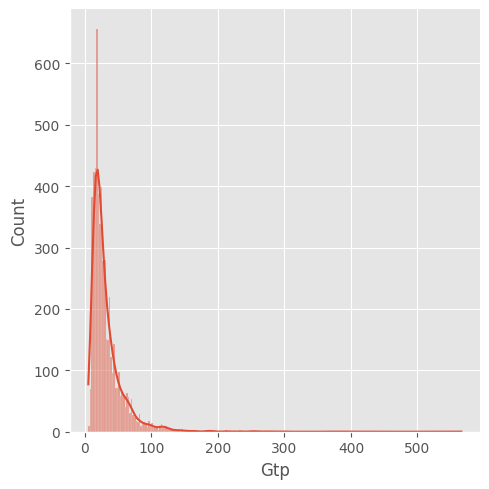

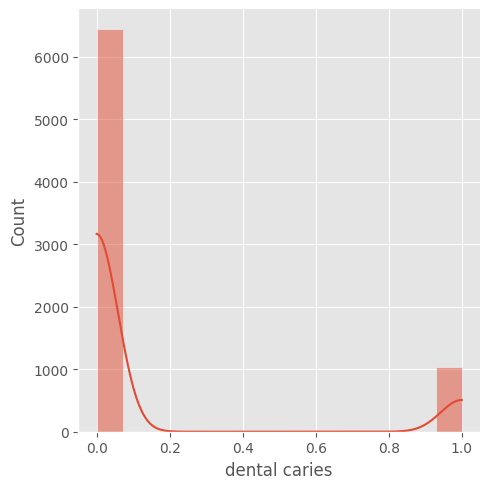

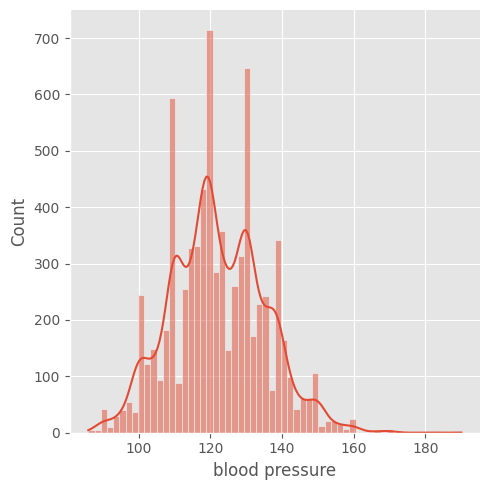

In [23]:
show_displots(df, df.columns)

In [24]:
iterative_imputer = IterativeImputer()
df_copy = df.copy()
df_copy[["ALT", "AST", "Gtp"]] = iterative_imputer.fit_transform(df[["ALT", "AST", "Gtp"]])

In [25]:
missing_table(df_copy)

Feature  CountMissing  PercentageMissing  Total
0                age          1982          26.507958   7477
1         height(cm)          1967          26.307343   7477
2         weight(kg)          1927          25.772369   7477
3         relaxation          1910          25.545005   7477
4        blood sugar          1947          26.039856   7477
5        Cholesterol          1966          26.293968   7477
6       triglyceride          1007          13.467968   7477
7                HDL          1962          26.240471   7477
8                LDL          1966          26.293968   7477
9         hemoglobin          1961          26.227096   7477
10     Urine protein          1901          25.424636   7477
11  serum creatinine          1921          25.692123   7477
12               AST             0           0.000000   7477
13               ALT             0           0.000000   7477
14               Gtp             0           0.000000   7477
15     dental caries             0           0.000000   7477
16    blood pressure             0           0.000000   7477

In [26]:
df_copy_1 = df_copy.copy()
df_copy_1[["height(cm)", "weight(kg)", "hemoglobin", "serum creatinine"]] = iterative_imputer.fit_transform(df_copy[["height(cm)", "weight(kg)", "hemoglobin", "serum creatinine"]])

In [27]:
missing_table(df_copy_1)

Feature  CountMissing  PercentageMissing  Total
0                age          1982          26.507958   7477
1         height(cm)             0           0.000000   7477
2         weight(kg)             0           0.000000   7477
3         relaxation          1910          25.545005   7477
4        blood sugar          1947          26.039856   7477
5        Cholesterol          1966          26.293968   7477
6       triglyceride          1007          13.467968   7477
7                HDL          1962          26.240471   7477
8                LDL          1966          26.293968   7477
9         hemoglobin             0           0.000000   7477
10     Urine protein          1901          25.424636   7477
11  serum creatinine             0           0.000000   7477
12               AST             0           0.000000   7477
13               ALT             0           0.000000   7477
14               Gtp             0           0.000000   7477
15     dental caries             0           0.000000   7477
16    blood pressure             0           0.000000   7477

In [28]:
df_copy_2 = df_copy_1.copy()
df_copy_2[["age","height(cm)"]] = iterative_imputer.fit_transform(df_copy_1[["age","height(cm)"]])

In [29]:
missing_table(df_copy_2)

Feature  CountMissing  PercentageMissing  Total
0                age             0           0.000000   7477
1         height(cm)             0           0.000000   7477
2         weight(kg)             0           0.000000   7477
3         relaxation          1910          25.545005   7477
4        blood sugar          1947          26.039856   7477
5        Cholesterol          1966          26.293968   7477
6       triglyceride          1007          13.467968   7477
7                HDL          1962          26.240471   7477
8                LDL          1966          26.293968   7477
9         hemoglobin             0           0.000000   7477
10     Urine protein          1901          25.424636   7477
11  serum creatinine             0           0.000000   7477
12               AST             0           0.000000   7477
13               ALT             0           0.000000   7477
14               Gtp             0           0.000000   7477
15     dental caries             0           0.000000   7477
16    blood pressure             0           0.000000   7477

In [30]:
df_copy_3 = df_copy_2.copy()
df_copy_3[["HDL", "LDL", "Cholesterol"]] = iterative_imputer.fit_transform(df_copy_2[["HDL", "LDL", "Cholesterol"]])
# df_copy_3.isna().sum() / len(df)

D:\Fax\LAIP\.venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [31]:
df_copy_3.isna().sum() / len(df)


age                 0.000000
height(cm)          0.000000
weight(kg)          0.000000
relaxation          0.255450
blood sugar         0.260399
Cholesterol         0.000000
triglyceride        0.134680
HDL                 0.000000
LDL                 0.000000
hemoglobin          0.000000
Urine protein       0.254246
serum creatinine    0.000000
AST                 0.000000
ALT                 0.000000
Gtp                 0.000000
dental caries       0.000000
blood pressure      0.000000
dtype: float64

In [32]:
df_copy_4 = df_copy_3.copy()
df_copy_4[["blood pressure", "relaxation"]] = iterative_imputer.fit_transform(df_copy_3[["blood pressure", "relaxation"]])

In [33]:
missing_table(df_copy_4)

Feature  CountMissing  PercentageMissing  Total
0                age             0           0.000000   7477
1         height(cm)             0           0.000000   7477
2         weight(kg)             0           0.000000   7477
3         relaxation             0           0.000000   7477
4        blood sugar          1947          26.039856   7477
5        Cholesterol             0           0.000000   7477
6       triglyceride          1007          13.467968   7477
7                HDL             0           0.000000   7477
8                LDL             0           0.000000   7477
9         hemoglobin             0           0.000000   7477
10     Urine protein          1901          25.424636   7477
11  serum creatinine             0           0.000000   7477
12               AST             0           0.000000   7477
13               ALT             0           0.000000   7477
14               Gtp             0           0.000000   7477
15     dental caries             0           0.000000   7477
16    blood pressure             0           0.000000   7477

In [34]:
df_copy_5 = df_copy_4.copy()

In [35]:
df_copy_5

age  height(cm)  weight(kg)  relaxation  blood sugar  Cholesterol  \
0     35.270295       180.0   65.000000   70.000000          NaN   149.000000   
1     45.000000       150.0   50.000000   88.000000         92.0   219.000000   
2     70.000000       175.0   75.000000   84.384052          NaN   217.000000   
3     40.000000       160.0   57.687918   82.263562        100.0   160.000000   
6     60.000000       155.0   50.000000   74.000000          NaN   197.037689   
...         ...         ...         ...         ...          ...          ...   
9995  35.270295       180.0   75.000000   69.000000        100.0   180.000000   
9996  47.581959       160.0   63.425610   72.000000        100.0   180.139887   
9997  35.000000       165.0   65.000000   72.000000         83.0   207.000000   
9998  47.581959       160.0   75.000000   82.000000         88.0   196.773161   
9999  35.000000       170.0   70.000000   75.371971         93.0   184.128080   

      triglyceride        HDL         LDL  hemoglobin  Urine protein  \
0              NaN  42.451600   87.000000   13.900000            1.0   
1              2.0  57.050886  137.000000   13.200000            NaN   
2              3.0  50.000000  142.000000   15.338055            1.0   
3              1.0  48.000000   84.000000   12.100000            1.0   
6              2.0  59.000000  114.847321   13.500000            1.0   
...            ...        ...         ...         ...            ...   
9995           0.0  76.000000   98.000000   14.700000            NaN   
9996           3.0  58.178627   99.000000   15.300000            1.0   
9997           NaN  65.000000  134.000000   14.678374            1.0   
9998           1.0  63.000000  112.000000   14.400000            1.0   
9999           4.0  57.971483  103.000000   17.500000            NaN   

      serum creatinine   AST        ALT        Gtp  dental caries  \
0             0.968727  19.0  16.232810  24.894391              0   
1             0.600000  26.0  17.000000  22.491130              0   
2             0.800000  22.0  22.000000  30.140869              0   
3             0.600000  15.0  19.000000  14.000000              0   
6             0.700000  44.0  28.000000  17.000000              0   
...                ...   ...        ...        ...            ...   
9995          0.800000  29.0  39.000000  73.000000              0   
9996          0.700000  22.0  49.000000  91.000000              0   
9997          0.900000  20.0  21.000000  23.000000              0   
9998          0.900000  18.0  15.000000  64.000000              0   
9999          1.100000  48.0  62.780362  89.000000              1   

      blood pressure  
0              112.0  
1              138.0  
2              137.0  
3              133.0  
6              138.0  
...              ...  
9995           120.0  
9996           110.0  
9997           128.0  
9998           121.0  
9999           120.0  

[7477 rows x 17 columns]

In [36]:
df_copy_5["blood sugar"] = df_copy_5["blood sugar"].fillna(df_copy_5["blood sugar"].mean())

In [37]:
df_copy_5["triglyceride"] = df_copy_5["triglyceride"].fillna(df_copy_5["triglyceride"].median())

In [38]:
missing_table(df_copy_5)

Feature  CountMissing  PercentageMissing  Total
0                age             0           0.000000   7477
1         height(cm)             0           0.000000   7477
2         weight(kg)             0           0.000000   7477
3         relaxation             0           0.000000   7477
4        blood sugar             0           0.000000   7477
5        Cholesterol             0           0.000000   7477
6       triglyceride             0           0.000000   7477
7                HDL             0           0.000000   7477
8                LDL             0           0.000000   7477
9         hemoglobin             0           0.000000   7477
10     Urine protein          1901          25.424636   7477
11  serum creatinine             0           0.000000   7477
12               AST             0           0.000000   7477
13               ALT             0           0.000000   7477
14               Gtp             0           0.000000   7477
15     dental caries             0           0.000000   7477
16    blood pressure             0           0.000000   7477

In [39]:
df_copy_5["Urine protein"].mode()

0    1.0
Name: Urine protein, dtype: float64

In [40]:
df_copy_5["Urine protein"] = df_copy_5["Urine protein"].fillna(df_copy_5["Urine protein"].mode()[0])

In [41]:
missing_table(df_copy_5)

Feature  CountMissing  PercentageMissing  Total
0                age             0                0.0   7477
1         height(cm)             0                0.0   7477
2         weight(kg)             0                0.0   7477
3         relaxation             0                0.0   7477
4        blood sugar             0                0.0   7477
5        Cholesterol             0                0.0   7477
6       triglyceride             0                0.0   7477
7                HDL             0                0.0   7477
8                LDL             0                0.0   7477
9         hemoglobin             0                0.0   7477
10     Urine protein             0                0.0   7477
11  serum creatinine             0                0.0   7477
12               AST             0                0.0   7477
13               ALT             0                0.0   7477
14               Gtp             0                0.0   7477
15     dental caries             0                0.0   7477
16    blood pressure             0                0.0   7477

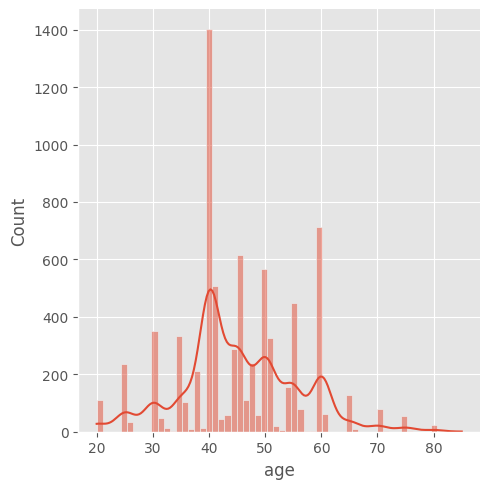

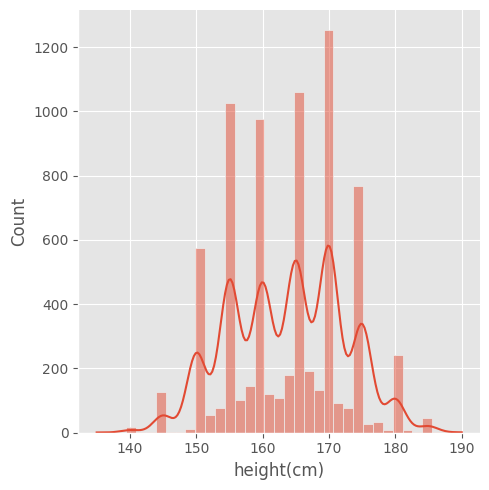

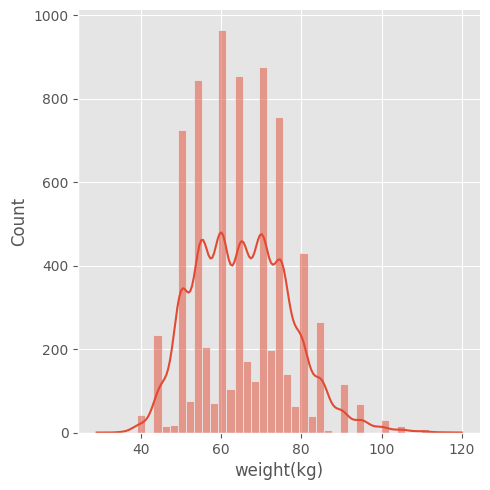

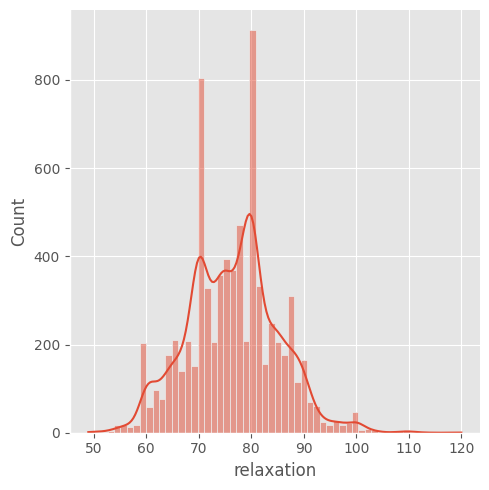

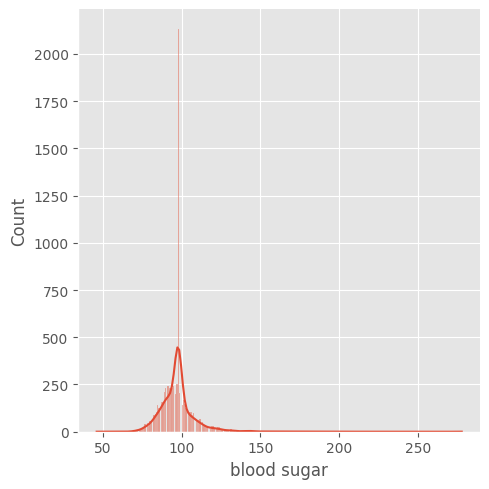

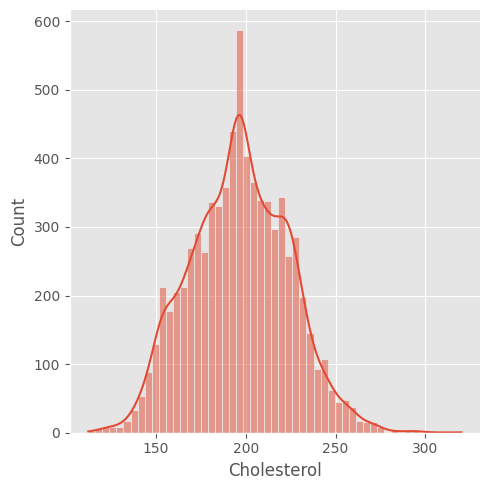

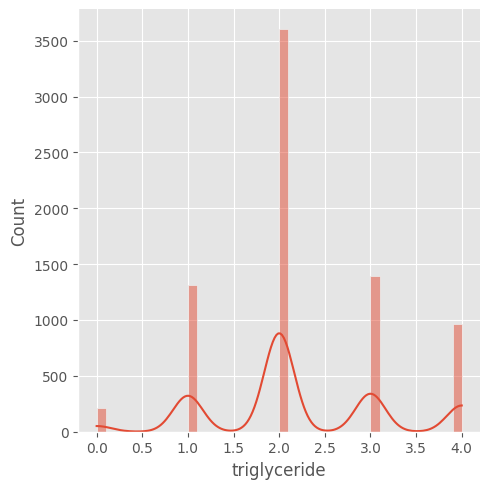

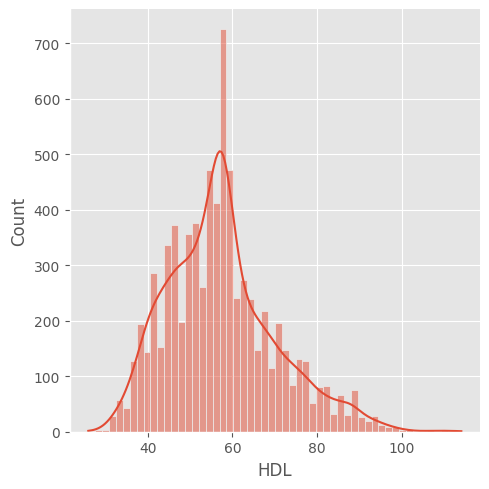

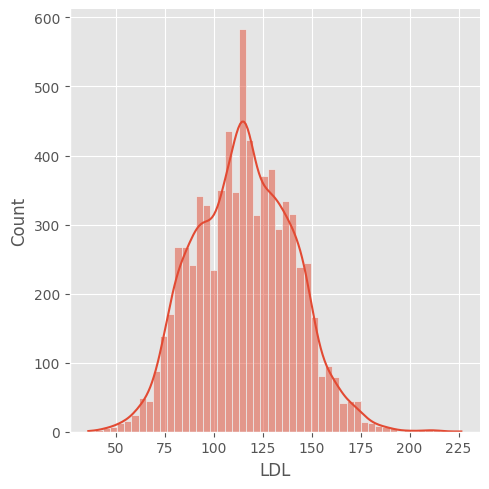

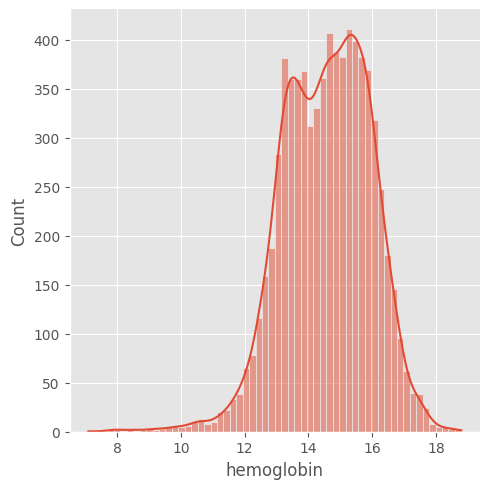

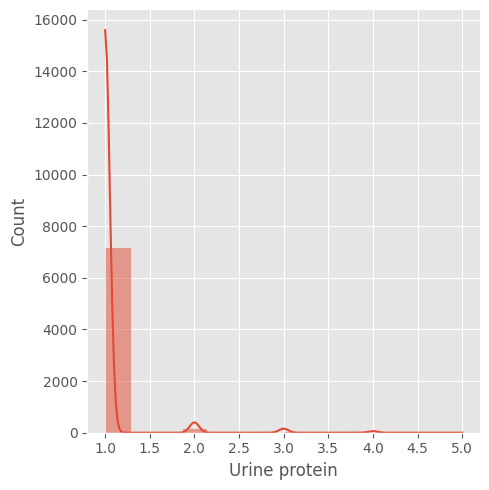

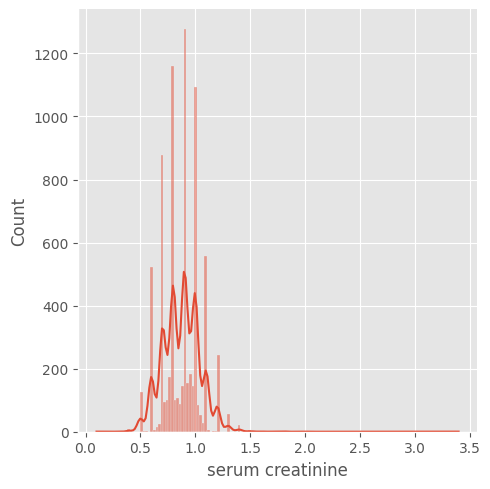

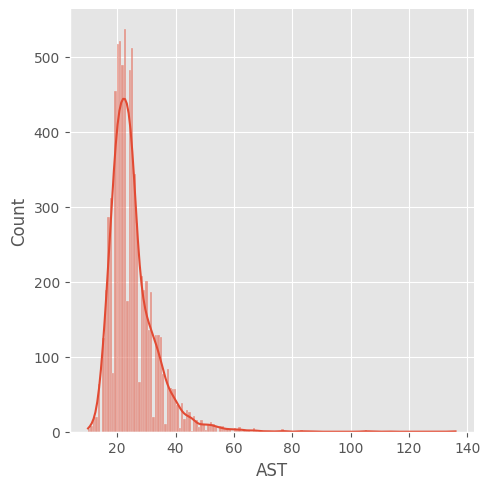

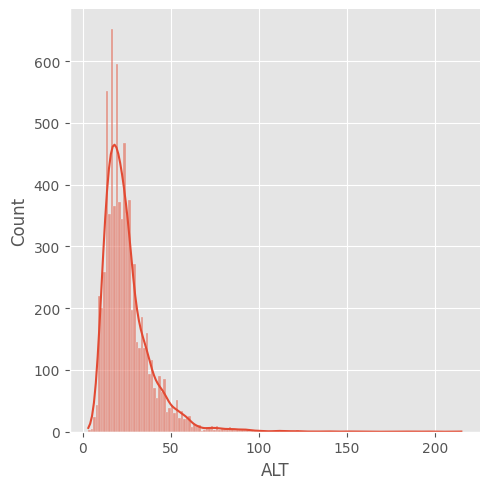

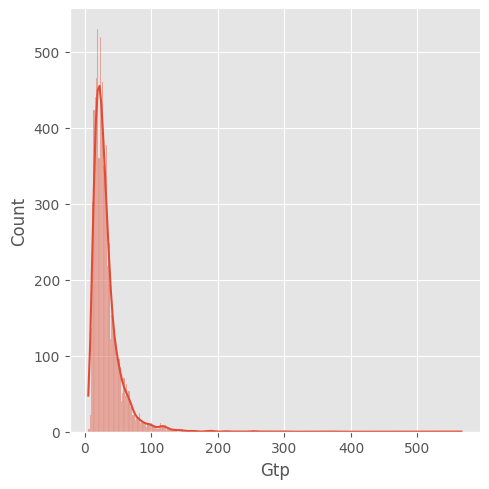

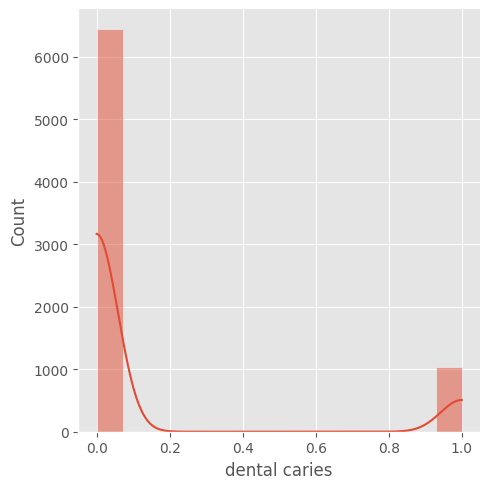

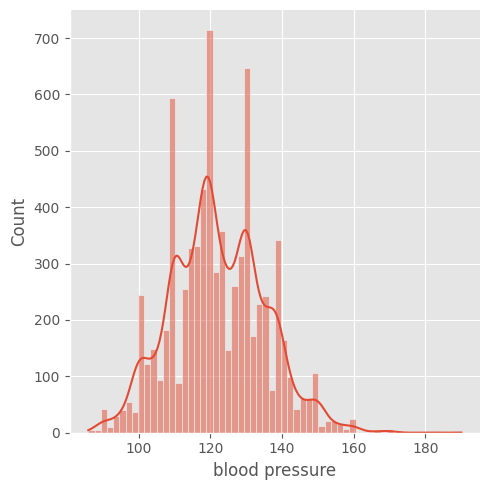

In [42]:
show_displots(df_copy_5, df_copy_5.columns)

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [43]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [44]:
# Write your code here. Add as many boxes as you need.
df_copy_5

age  height(cm)  weight(kg)  relaxation  blood sugar  Cholesterol  \
0     35.270295       180.0   65.000000   70.000000    97.849367   149.000000   
1     45.000000       150.0   50.000000   88.000000    92.000000   219.000000   
2     70.000000       175.0   75.000000   84.384052    97.849367   217.000000   
3     40.000000       160.0   57.687918   82.263562   100.000000   160.000000   
6     60.000000       155.0   50.000000   74.000000    97.849367   197.037689   
...         ...         ...         ...         ...          ...          ...   
9995  35.270295       180.0   75.000000   69.000000   100.000000   180.000000   
9996  47.581959       160.0   63.425610   72.000000   100.000000   180.139887   
9997  35.000000       165.0   65.000000   72.000000    83.000000   207.000000   
9998  47.581959       160.0   75.000000   82.000000    88.000000   196.773161   
9999  35.000000       170.0   70.000000   75.371971    93.000000   184.128080   

      triglyceride        HDL         LDL  hemoglobin  Urine protein  \
0              2.0  42.451600   87.000000   13.900000            1.0   
1              2.0  57.050886  137.000000   13.200000            1.0   
2              3.0  50.000000  142.000000   15.338055            1.0   
3              1.0  48.000000   84.000000   12.100000            1.0   
6              2.0  59.000000  114.847321   13.500000            1.0   
...            ...        ...         ...         ...            ...   
9995           0.0  76.000000   98.000000   14.700000            1.0   
9996           3.0  58.178627   99.000000   15.300000            1.0   
9997           2.0  65.000000  134.000000   14.678374            1.0   
9998           1.0  63.000000  112.000000   14.400000            1.0   
9999           4.0  57.971483  103.000000   17.500000            1.0   

      serum creatinine   AST        ALT        Gtp  dental caries  \
0             0.968727  19.0  16.232810  24.894391              0   
1             0.600000  26.0  17.000000  22.491130              0   
2             0.800000  22.0  22.000000  30.140869              0   
3             0.600000  15.0  19.000000  14.000000              0   
6             0.700000  44.0  28.000000  17.000000              0   
...                ...   ...        ...        ...            ...   
9995          0.800000  29.0  39.000000  73.000000              0   
9996          0.700000  22.0  49.000000  91.000000              0   
9997          0.900000  20.0  21.000000  23.000000              0   
9998          0.900000  18.0  15.000000  64.000000              0   
9999          1.100000  48.0  62.780362  89.000000              1   

      blood pressure  
0              112.0  
1              138.0  
2              137.0  
3              133.0  
6              138.0  
...              ...  
9995           120.0  
9996           110.0  
9997           128.0  
9998           121.0  
9999           120.0  

[7477 rows x 17 columns]

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [45]:
# Write your code here. Add as many boxes as you need.

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [46]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

In [47]:
X = df_copy_5.drop(columns="blood pressure")
Y = df_copy_5["blood pressure"]

In [48]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

In [49]:
xg_boost_mean_squared_errors = []
xg_boost_r2_errors = []
random_forest_mean_square_errors = []
random_forest_r2_scores = []

for train_index, test_index in k_fold.split(X):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    
    xgb_regressor = XGBRegressor()
    random_forest = RandomForestRegressor()
    xgb_regressor.fit(x_train, y_train)
    random_forest.fit(x_train, y_train)

    predict_xg_boost = xgb_regressor.predict(x_test)
    predict_random_forest = random_forest.predict(x_test)
    
    xgboost_mse = mean_squared_error(y_test, predict_xg_boost)
    random_forest_mse = mean_squared_error(y_test, predict_random_forest)
    
    xgboost_r2 = r2_score(y_test, predict_xg_boost)
    random_forest_r2 = r2_score(y_test, predict_random_forest)
    
    xg_boost_mean_squared_errors.append(xgboost_mse)
    xg_boost_r2_errors.append(xgboost_r2)
    random_forest_mean_square_errors.append(random_forest_mse)
    random_forest_r2_scores.append(random_forest_r2)

print("XGBoost MSE mean =" , sum(xg_boost_mean_squared_errors) / len(xg_boost_mean_squared_errors))
print("XGBoost r2 mean =", sum(xg_boost_r2_errors) / len(xg_boost_r2_errors))
print("RandomForest MSE mean =", sum(random_forest_mean_square_errors) / len(random_forest_mean_square_errors))
print("RandomForest r2 mean =",sum(random_forest_r2_scores) / len(random_forest_r2_scores) )



XGBoost MSE mean = 61.17131114618176
XGBoost r2 mean = 0.6450539415919045
RandomForest MSE mean = 56.84089292883588
RandomForest r2 mean = 0.6700905599760312


In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [51]:
# Write your code here. Add as many boxes as you need.
y_train, y_test = train_test_split(Y,random_state=0,shuffle=True)

In [52]:
xgb_regressor = XGBRegressor()
random_forest = RandomForestClassifier()
xgb_regressor.fit(x_train, y_train)
random_forest = random_forest.fit(x_train,y_train)

XGBoostError: [23:11:03] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\data\data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (5607 vs. 0) : Incorrect size for labels.

In [ ]:
predict = cross_val_predict(xgb_regressor, X, Y, cv=5)

In [ ]:
len(predict)

In [ ]:
len(Y)

In [ ]:
r2_score(Y, predict)

In [ ]:
score = cross_val_score(xgb_regressor, X, Y, cv=5, scoring="r2")

In [ ]:
sum(score) / len(score)

# Cross-Validation

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.